# Demonstração de transformações lineares

Este notebook demonstra a criação e aplicação de duas matrizes de transformação:

1. Rotação horária de 90°

2. Cisalhamento (shear) na direção x

Primeiro importamos a biblioteca `matplotlib` para criar as visualizações gráfica e `numpy` para realizar os cálculos

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Definimos a função `plot_vector` para criar a visualização de vetores

In [ ]:
def plot_vectors(title, vectors):
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    colors = plt.cm.tab10(range(len(vectors)))

    for i, (x, y) in enumerate(vectors):
        plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color=colors[i])
        pos_x = x + 0.1
        pos_y = y + 0.1 if y >= 0 else y - 0.4
        plt.text(pos_x, pos_y, f"({x}, {y})", fontsize=12, color=colors[i])

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xticks(range(-5, 6))
    plt.yticks(range(-5, 6))

    plt.title(title)
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

## Vetores Unitários

Sabendo que a tranformação linear é uma função de multiplicação dos vetores unitários por uma matriz, temos:

$$vetor_A = \begin{pmatrix}1 \\ 0
            
            \end{pmatrix}$$
$$vetor_B = \begin{pmatrix}0 \\ 1
            
            \end{pmatrix}$$

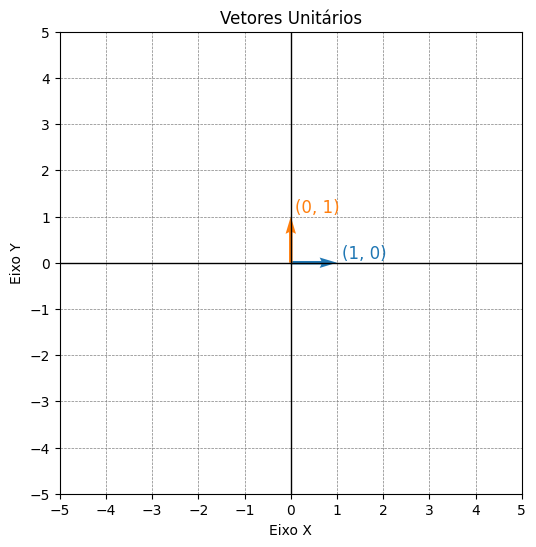

In [50]:
unit_vectors = [[1, 0], [0, 1]]

plot_vectors("Vetores Unitários", unit_vectors)

## Rotação em 90°

Ao rotacionar o vetor A em 90°, que está sobre o eixo X, ele passará a ficar sobre o eixo Y negativamente, obtendo:

$$vetor_A = \begin{pmatrix}0 \\ -1
            
            \end{pmatrix}$$

A lógica para o vetor B é semelhante, originalmente ele está sobre o eixo Y positivamente e ao aplicar a rotação, passa a ficar sobre o eixo X:

$$vetor_B = \begin{pmatrix}1 \\ 0
            
            \end{pmatrix}$$

Assim, para aplicar uma transformação linear de rotação horária de 90°, basta aplicar a matriz de transformação obtida a partir dos vetores unitários:

$$
Matriz_t = \begin{pmatrix}0 & 1 \\
            
            -1 & 0\end{pmatrix}
            
$$

Note que após a rotação $vetor_A' = -vetor_B$ e $vetor_B' = vetor_A$

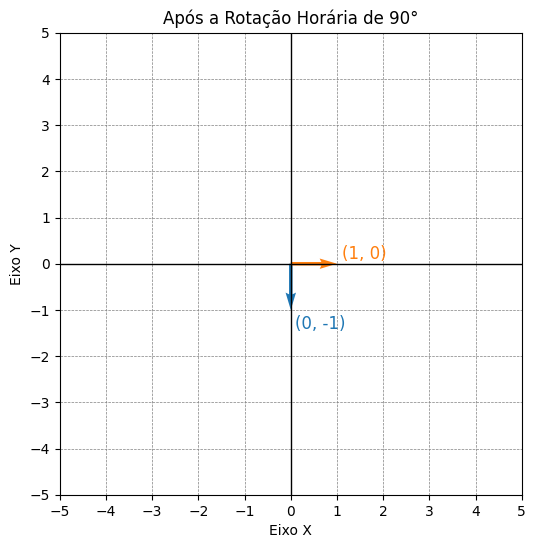

In [52]:
rotationed_unit_vectors = [[0, -1], [1, 0]]
plot_vectors("Após a Rotação Horária de 90°", rotationed_unit_vectors)

Assim, concluímos que a matriz de rotação horária de 90° é dada por
$$
R = \begin{pmatrix}0 & 1 \\
            
            -1 & 0\end{pmatrix}
            
$$

In [54]:
rotation_matrix = np.array([[0, 1], [-1, 0]])

### Exemplo

Usamos 2 vetores arbitrários e multiplicamos cada um pela matriz de rotação encontrada anteriormente para visualizar a transformação.

Matriz de Vetores Arbitrários:
[[ 2 -1]
 [ 3  2]]
Matriz de Vetores Arbitrários após Rotação Horária de 90°:
[[ 3  2]
 [-2  1]]


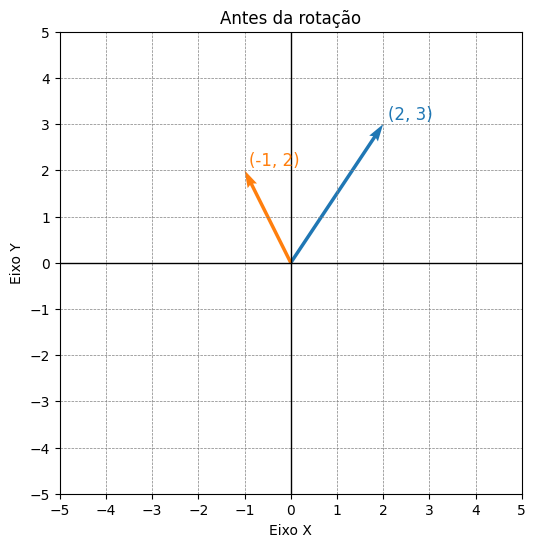

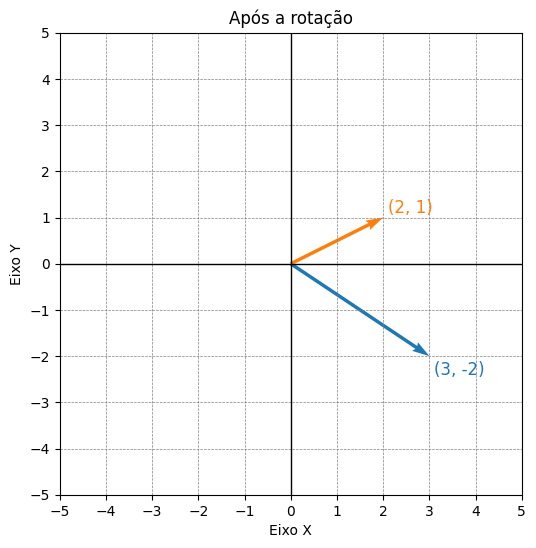

In [55]:
vectors = np.array([[2, 3], [-1, 2]])
rotationed_vectors = np.array([rotation_matrix @ vector for vector in vectors])

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários após Rotação Horária de 90°:")
print(rotationed_vectors.T)

plot_vectors('Antes da rotação', vectors)
plot_vectors('Após a rotação', rotationed_vectors)